# Machine Learning - Topic 2

**Clusterization** - **Кластеризация**

Кластеризация — это задача разделения совокупности или точек данных на несколько групп таким образом, чтобы точки данных в одних и тех же группах были более похожи на другие точки данных в той же группе и отличались от точек данных в других группах. По сути, это совокупность объектов на основе сходства и несходства между ними.

Сам по себе кластерный анализ — это не один конкретный алгоритм , а общая задача, которую необходимо решить. Этого можно достичь с помощью различных алгоритмов, которые существенно различаются в понимании того, что представляет собой кластер и как его эффективно найти и это одна из причин, почему существует так много алгоритмов кластеризации.

В данном разделе будут рассмотрены различные алгоритмы кластеризации, приведены примеры, как с ручными вычислениями, так и с использованием библиотек Python.

1. Введение. Что такое кластеризация.
2. Формальная постановка задачи кластеризации.
3. Теорема Клейнберга. Аксиомы кластеризации.
4. Метрики расстояния.
5. Алгоритм k-средних. Примеры, модификации.
6. Выбор числа кластеров: метод локтя., силуэтный метод.
7. Yellowbrick. Визуализация выбора числа кластеров
8. Алгоритм DBSCAN: основные понятия, описание алгоритма, примеры, обсуждение.
9. Примеры на Питоне (стандартные кластеры и кластеры сложной формы).
10. Настройка гиперпараметров DBSCAN.
11. Агломеративная кластеризация: идея, метрики сходства, алгоритм, примеры, сравнение метрик.
12. Нисходящая иерархическая кластеризация.
13. Кластеризация с помощью графов: компоненты связности, минимальное остовое дерево.
14. Внешние меры оценки качества.
15. Индексы Рэнда, Жаккара, Фоулкса—Мэллоуза, F-мера, примеры.
16. Внутренние меры оценки качества.
17. Компактность кластеров, индексы Данна, Дэвиcа—Болдуина. Примеры.
18. Меры оценки качества в Python.

In [8]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.datasets import make_blobs, load_iris
from sklearn.metrics import rand_score, jaccard_score, fowlkes_mallows_score, davies_bouldin_score
from yellowbrick.cluster import KElbowVisualizer
from matplotlib import colormaps

import matplotlib.pyplot as plt

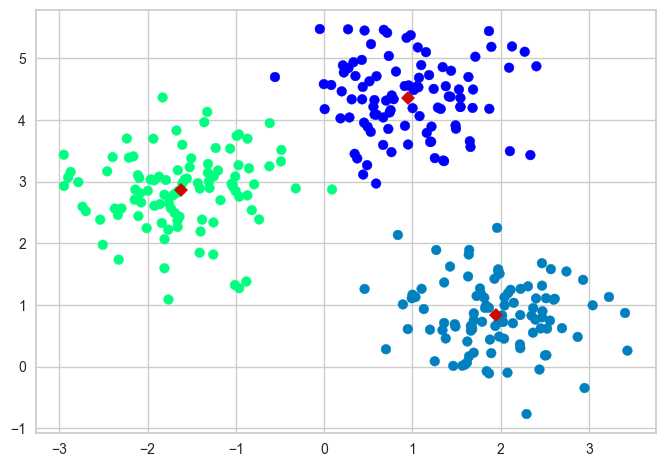

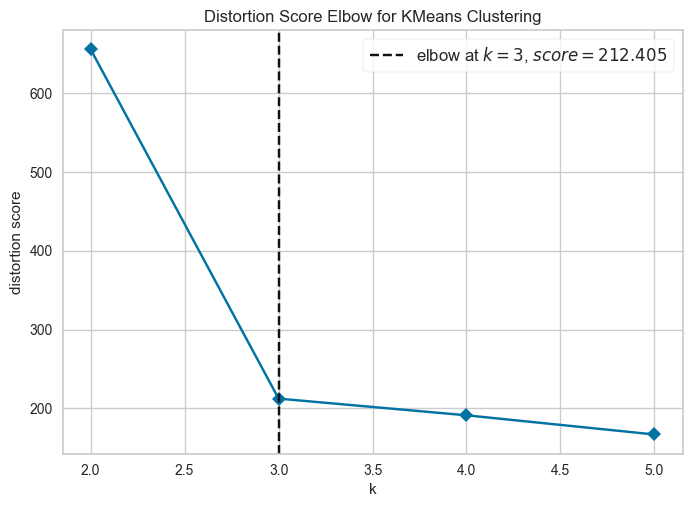

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
# KMeans Clustering

X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.6, random_state=0)

plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap=colormaps['winter'])

kmeans = KMeans(n_init='auto', n_clusters=3)
kmeans.fit(X)

for center in kmeans.cluster_centers_:
    plt.plot(*center, 'Dr')
plt.show()

vis = KElbowVisualizer(kmeans, k=5, timings=False)
vis.fit(X)
vis.show()

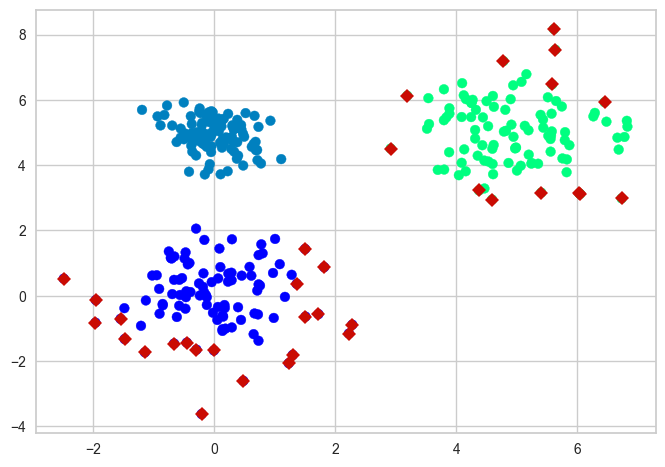

In [10]:
# DBSCAN Clustering

X, y_true = make_blobs(n_samples=300, centers=[[0, 0], [0, 5], [5, 5]], cluster_std=[1.0, 0.5, 1.0])

plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap=colormaps['winter'])

dbscan = DBSCAN(eps=0.50, min_samples=5)
labels = dbscan.fit_predict(X)

for i, label in enumerate(labels):
    if label == -1:
        plt.plot(*X[i], 'Dr')
plt.show()

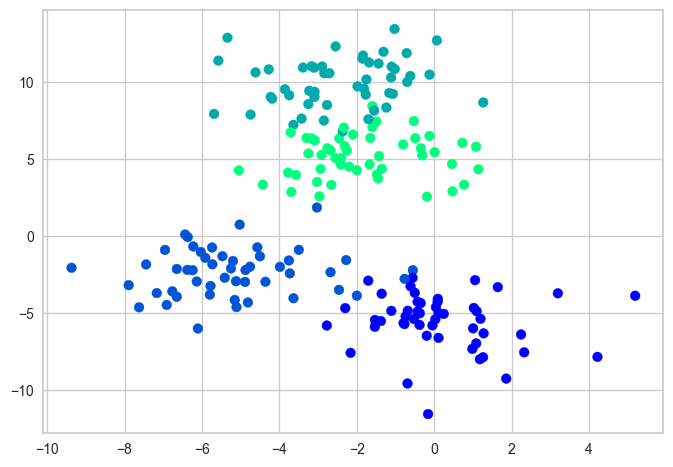

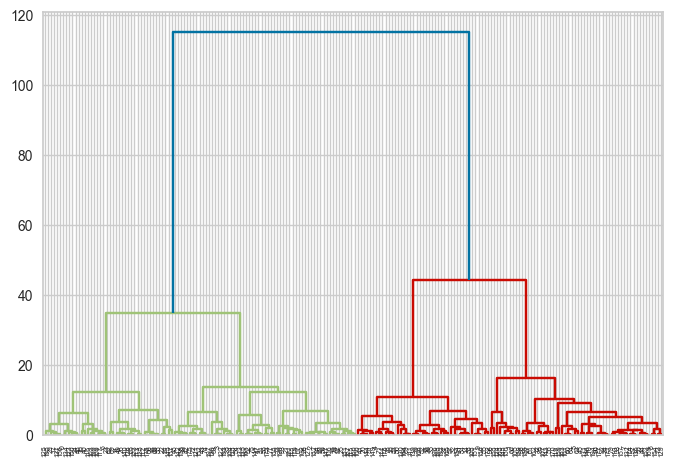

In [11]:
# Agglomerative Clustering and Dendrogram

X, y_true = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.6, random_state=50)

plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap=colormaps['winter'])
plt.show()

dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

In [12]:
# Iris Clustering

iris = load_iris()
df = iris.data[:, 0:2]
dt = iris.target

agg_clustering = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
labels = agg_clustering.fit_predict(df)

In [13]:
# Previous clustering scoring

print(rand_score(dt, labels))
print(jaccard_score(dt, labels, average=None)[2])
print(fowlkes_mallows_score(dt, labels))
print(davies_bouldin_score(df, labels))

0.7795078299776287
0.0958904109589041
0.6791579935165271
0.8019006296926161
